In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
# set the length of the n-bit input string. 

n = 2
m = 2

oracle = QuantumCircuit(n+m)
oracle.barrier()
oracle.cx(0,2)
oracle.cx(0,3)
oracle.cx(1,2)
oracle.cx(1,3)
oracle.barrier()
oracle.draw()

░                      ░ 
q_0: ─░───■────■─────────────░─
      ░   │    │             ░ 
q_1: ─░───┼────┼────■────■───░─
      ░ ┌─┴─┐  │  ┌─┴─┐  │   ░ 
q_2: ─░─┤ X ├──┼──┤ X ├──┼───░─
      ░ └───┘┌─┴─┐└───┘┌─┴─┐ ░ 
q_3: ─░──────┤ X ├─────┤ X ├─░─
      ░      └───┘     └───┘ ░

In [2]:
simonAlg = QuantumCircuit(n+m,n+m)
for qubit in range(n):
    simonAlg.h(qubit)
simonAlg += oracle
simonAlg.draw()

/var/folders/80/l0hfnvbn49g0wln3399w9jzc0000gn/T/ipykernel_1627/3537940583.py:4: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simonAlg += oracle


┌───┐ ░                      ░ 
q_0: ┤ H ├─░───■────■─────────────░─
     ├───┤ ░   │    │             ░ 
q_1: ┤ H ├─░───┼────┼────■────■───░─
     └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │   ░ 
q_2: ──────░─┤ X ├──┼──┤ X ├──┼───░─
           ░ └───┘┌─┴─┐└───┘┌─┴─┐ ░ 
q_3: ──────░──────┤ X ├─────┤ X ├─░─
           ░      └───┘     └───┘ ░ 
c: 4/═══════════════════════════════

In [3]:
for qubit in range(m):
    simonAlg.measure(qubit + n, qubit + n)
simonAlg.barrier()
simonAlg.draw()

┌───┐ ░                      ░        ░ 
q_0: ┤ H ├─░───■────■─────────────░────────░─
     ├───┤ ░   │    │             ░        ░ 
q_1: ┤ H ├─░───┼────┼────■────■───░────────░─
     └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │   ░ ┌─┐    ░ 
q_2: ──────░─┤ X ├──┼──┤ X ├──┼───░─┤M├────░─
           ░ └───┘┌─┴─┐└───┘┌─┴─┐ ░ └╥┘┌─┐ ░ 
q_3: ──────░──────┤ X ├─────┤ X ├─░──╫─┤M├─░─
           ░      └───┘     └───┘ ░  ║ └╥┘ ░ 
c: 4/════════════════════════════════╩══╩════
                                     2  3

In [4]:
for qubit in range(n):
    simonAlg.h(qubit)
simonAlg.barrier()
for qubit in range(n):
    simonAlg.measure(qubit,qubit)
simonAlg.draw()

┌───┐ ░                      ░        ░ ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─░───■────■─────────────░────────░─┤ H ├─░─┤M├───
     ├───┤ ░   │    │             ░        ░ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─░───┼────┼────■────■───░────────░─┤ H ├─░──╫─┤M├
     └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │   ░ ┌─┐    ░ └───┘ ░  ║ └╥┘
q_2: ──────░─┤ X ├──┼──┤ X ├──┼───░─┤M├────░───────░──╫──╫─
           ░ └───┘┌─┴─┐└───┘┌─┴─┐ ░ └╥┘┌─┐ ░       ░  ║  ║ 
q_3: ──────░──────┤ X ├─────┤ X ├─░──╫─┤M├─░───────░──╫──╫─
           ░      └───┘     └───┘ ░  ║ └╥┘ ░       ░  ║  ║ 
c: 4/════════════════════════════════╩══╩═════════════╩══╩═
                                     2  3             0  1

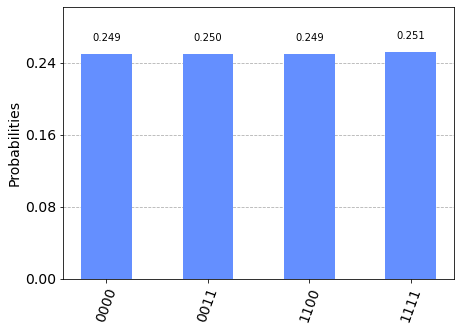

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_simon = transpile(simonAlg, aer_sim)
shots= 100000
results = aer_sim.run(transpiled_simon, shots = shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [7]:
#bell states --> variable elimination

import sys
#sys.path.insert(0, '/Users/arpan/Desktop/Aresty_Quantum/pgmpy/pgmpy')
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
import numpy as np
from pgmpy.inference import VariableElimination


simon = BayesianNetwork([('q0m0', 'q0m1'), ('q0m1', 'q0m2'), ('q1m0', 'q1m1'), ('q1m1', 'q1m2'), ('q2m0', 'q2m1'), ('q2m1', 'q2m2'), ('q3m0', 'q3m1'), ('q3m1', 'q3m2'), ('q0m1', 'q2m2'), ('q0m1', 'q3m2'), ('q1m1', 'q2m2'), ('q1m1', 'q3m2')])

cpd_q0m0 = TabularCPD(variable = 'q0m0', variable_card = 2, values = [[0], [1]])
cpd_q1m0 = TabularCPD(variable = 'q1m0', variable_card = 2, values = [[0], [1]])
cpd_q2m0 = TabularCPD(variable = 'q2m0', variable_card = 2, values = [[0], [1]])
cpd_q3m0 = TabularCPD(variable = 'q3m0', variable_card = 2, values = [[0], [1]])
cpd_q0m1 = TabularCPD(variable='q0m1', variable_card = 2, values = [[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]], evidence = ['q0m0'], evidence_card = [2])
cpd_q1m1 = TabularCPD(variable='q1m1', variable_card = 2, values = [[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]], evidence = ['q1m0'], evidence_card = [2])
cpd_q2m1 = TabularCPD(variable='q2m1', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q2m0'], evidence_card = [2])
cpd_q3m1 = TabularCPD(variable='q3m1', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q3m0'], evidence_card = [2])
cpd_q0m2 = TabularCPD(variable='q0m2', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q0m1'], evidence_card = [2])
cpd_q1m2 = TabularCPD(variable='q1m2', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q1m1'], evidence_card = [2])
cpd_q2m2 = TabularCPD(variable='q2m2', variable_card = 2, values = [[1,0,0,1,0,1,1,0],[0,1,1,0,1,0,0,1]], evidence = ['q0m1', 'q1m1', 'q2m1'], evidence_card = [2,2,2])
cpd_q3m2 = TabularCPD(variable='q3m2', variable_card = 2, values = [[1,0,0,1,0,1,1,0],[0,1,1,0,1,0,0,1]], evidence = ['q0m1', 'q1m1', 'q3m1'], evidence_card = [2,2,2])

simon.add_cpds(cpd_q0m0, cpd_q1m0, cpd_q2m0, cpd_q3m0, cpd_q0m1, cpd_q1m1, cpd_q2m1, cpd_q3m1, cpd_q0m2, cpd_q1m2, cpd_q2m2, cpd_q3m2)
simonInfer = VariableElimination(simon)

q = simonInfer.query(['q0m2', 'q1m2', 'q2m2', 'q3m2'], evidence = {'q0m0': 0, 'q1m0': 0, 'q2m0': 0, 'q3m0': 0})
print(q)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+---------+---------+---------+---------+----------------------------+
| q1m2    | q3m2    | q0m2    | q2m2    |   phi(q1m2,q3m2,q0m2,q2m2) |
+=========+=========+=========+=========+============================+
| q1m2(0) | q3m2(0) | q0m2(0) | q2m2(0) |                     0.5000 |
+---------+---------+---------+---------+----------------------------+
| q1m2(0) | q3m2(0) | q0m2(0) | q2m2(1) |                     0.0000 |
+---------+---------+---------+---------+----------------------------+
| q1m2(0) | q3m2(0) | q0m2(1) | q2m2(0) |                     0.0000 |
+---------+---------+---------+---------+----------------------------+
| q1m2(0) | q3m2(0) | q0m2(1) | q2m2(1) |                     0.0000 |
+---------+---------+---------+---------+----------------------------+
| q1m2(0) | q3m2(1) | q0m2(0) | q2m2(0) |                     0.0000 |
+---------+---------+---------+---------+----------------------------+
| q1m2(0) | q3m2(1) | q0m2(0) | q2m2(1) |                     0.0000 |
+-----

In [6]:
simon2 = BayesianNetwork([('q0m3', 'q0m4'), ('q1m3', 'q1m4'), ('q2m3', 'q2m4'), ('q3m3', 'q3m4'), ('q0m4', 'q0m5'), ('q0m4', 'q1m5'), ('q1m4', 'q1m5'), ('q2m4', 'q2m5'), ('q3m4', 'q3m5'), ('q0m5', 'q0m6'), ('q1m5', 'q1m6'), ('q2m5', 'q2m6'), ('q3m5', 'q3m6')])

cpd_q0m3 = TabularCPD(variable = 'q0m3', variable_card = 2, values = [[0], [1]])
cpd_q1m3 = TabularCPD(variable = 'q1m3', variable_card = 2, values = [[0], [1]])
cpd_q2m3 = TabularCPD(variable = 'q2m3', variable_card = 2, values = [[0], [1]])
cpd_q3m3 = TabularCPD(variable = 'q3m3', variable_card = 2, values = [[0], [1]])
cpd_q0m4 = TabularCPD(variable='q0m4', variable_card = 2, values = [[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]], evidence = ['q0m3'], evidence_card = [2])
cpd_q1m4 = TabularCPD(variable='q1m4', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q1m3'], evidence_card = [2])
cpd_q2m4 = TabularCPD(variable='q2m4', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q2m3'], evidence_card = [2])
cpd_q3m4 = TabularCPD(variable='q3m4', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q3m3'], evidence_card = [2])
cpd_q0m5 = TabularCPD(variable='q0m5', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q0m4'], evidence_card = [2])
cpd_q1m5 = TabularCPD(variable='q1m5', variable_card = 2, values = [[1, 0, 0, 1], [0, 1, 1, 0]], evidence = ['q0m4', 'q1m4'], evidence_card = [2,2])
cpd_q2m5 = TabularCPD(variable='q2m5', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q2m4'], evidence_card = [2])
cpd_q3m5 = TabularCPD(variable='q3m5', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q3m4'], evidence_card = [2])
cpd_q0m6 = TabularCPD(variable='q0m6', variable_card = 2, values = [[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]], evidence = ['q0m5'], evidence_card = [2])
cpd_q1m6 = TabularCPD(variable='q1m6', variable_card = 2, values = [[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]], evidence = ['q1m5'], evidence_card = [2])
cpd_q2m6 = TabularCPD(variable='q2m6', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q2m5'], evidence_card = [2])
cpd_q3m6 = TabularCPD(variable='q3m6', variable_card = 2, values = [[1, 0], [0, 1]], evidence = ['q3m5'], evidence_card = [2])

simon2.add_cpds(cpd_q0m3, cpd_q1m3, cpd_q2m3, cpd_q3m3, cpd_q0m4, cpd_q1m4, cpd_q2m4, cpd_q3m4, cpd_q0m5, cpd_q1m5, cpd_q2m5, cpd_q3m5, cpd_q0m6, cpd_q1m6, cpd_q2m6, cpd_q3m6)
simon2Infer = VariableElimination(simon2)

q = simon2Infer.query(['q0m6', 'q1m6', 'q2m6', 'q3m6'], evidence = {'q0m3': 0, 'q1m3': 0, 'q2m3': 0, 'q3m3': 0})
q1 = simon2Infer.query(['q0m6', 'q1m6', 'q2m6', 'q3m6'], evidence = {'q0m3': 0, 'q1m3': 1, 'q2m3': 1, 'q3m3': 1})
print(q)
print(q1)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

+---------+---------+---------+---------+----------------------------+
| q3m6    | q2m6    | q0m6    | q1m6    |   phi(q3m6,q2m6,q0m6,q1m6) |
+=========+=========+=========+=========+============================+
| q3m6(0) | q2m6(0) | q0m6(0) | q1m6(0) |                     0.7071 |
+---------+---------+---------+---------+----------------------------+
| q3m6(0) | q2m6(0) | q0m6(0) | q1m6(1) |                     0.0000 |
+---------+---------+---------+---------+----------------------------+
| q3m6(0) | q2m6(0) | q0m6(1) | q1m6(0) |                     0.0000 |
+---------+---------+---------+---------+----------------------------+
| q3m6(0) | q2m6(0) | q0m6(1) | q1m6(1) |                     0.7071 |
+---------+---------+---------+---------+----------------------------+
| q3m6(0) | q2m6(1) | q0m6(0) | q1m6(0) |                     0.0000 |
+---------+---------+---------+---------+----------------------------+
| q3m6(0) | q2m6(1) | q0m6(0) | q1m6(1) |                     0.0000 |
+-----